In [2]:
%matplotlib inline

from pymatgen import MPRester
from t4iss.module1 import *
import t4iss

lhermitte-XPS-13-9343


In [2]:
# the directory with XANES data
t4iss.global_cache['dbroot'] = "/home/lhermitte/research/projects/t4iss/data/XANES"
# no feff_cmd
t4iss.global_cache['feff_cmd'] = ""
# the data dir
t4iss.global_cache['data_dir'] = "/home/lhermitte/research/projects/t4iss/unknowns"

# put your Materials Project (MP) API key below
mpr = MPRester('JCRhEVIMvKOrQ1ot') #this is mine !!!!
#mpr = MPRester('xxxxxx')

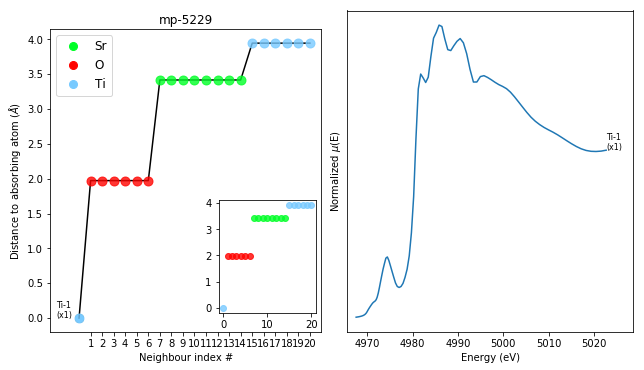

In [3]:
''' this cell downloads Ti-K edge XANES data of SrTiO3 from MP and plots it.
'mp-5229' is the structure id of SrTiO3 in MP. '''

get_XANES(mpr,mpid='mp-5229',absorbing_atom='Ti',export_figure=True)

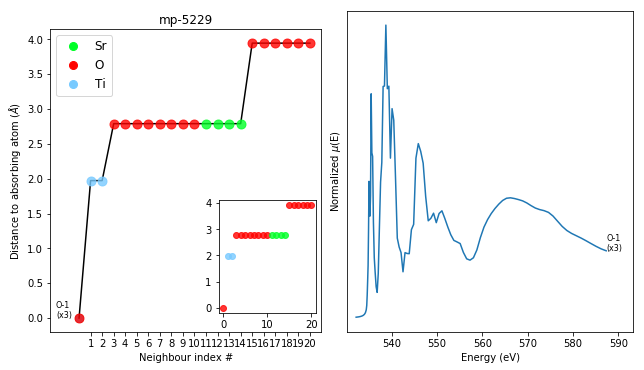

In [4]:
'''Similarly, this cell plots O-K edge. Although we have 3 oxygens in the 
structure, they are identical. '''

get_XANES(mpr,mpid='mp-5229',absorbing_atom='O',export_figure=True,run_feff=True)

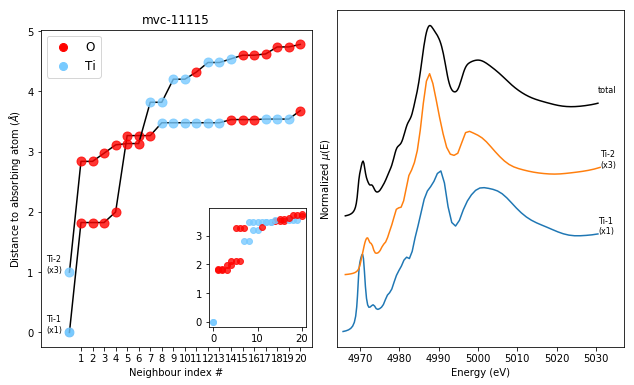

In [5]:
''' XANES for structure 'mvc-11115' is not available in MP. But I have calculated 
it before. XANES.zip on GitHub has its XANES. '''

get_XANES(mpr,mpid='mvc-11115',absorbing_atom='Ti',export_figure=True)

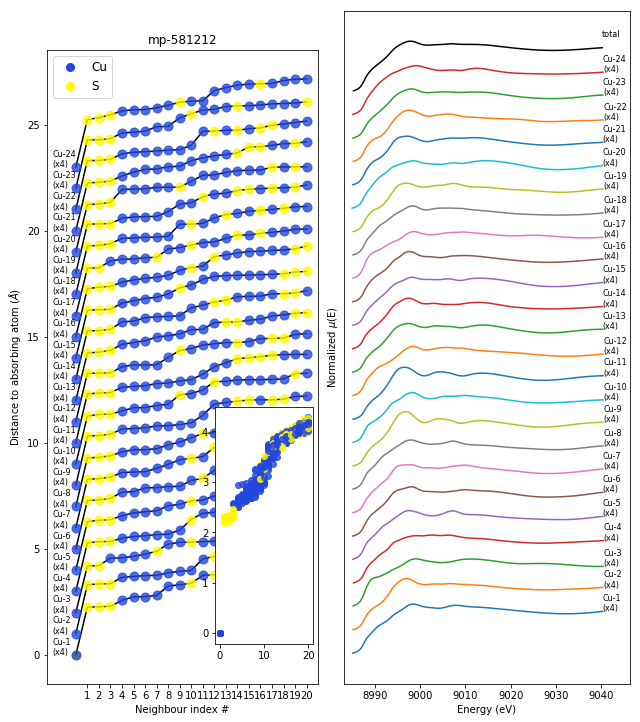

In [6]:
''' Structure may be complicated for some materials. Here is the plot
for CuS. It has 96 Cu atoms. But some of them are equivalent. Total number
of inequivalent sites is 24. As in the plot, Cu-3 and Cu-7 are 2-coordinated. '''

get_XANES(mpr,mpid='mp-581212',absorbing_atom='Cu',export_figure=True)

In [7]:
''' This will search for string "Li-Mn-Ti-O" in MP and retrive ids 
of structures having less than 20 atoms in unit-cell. '''

mpid_list = search_MP(mpr,search_pattern='Li-Mn-Ti-O',nmax=20)
print(mpid_list)

Found 20 structures
['mp-764051', 'mp-853187', 'mp-762872', 'mp-762163', 'mp-762811', 'mp-766150', 'mp-768002', 'mp-769924', 'mp-770961', 'mp-770956', 'mp-771102', 'mp-771440', 'mp-771528', 'mp-771622', 'mp-771683', 'mp-771753', 'mp-771928', 'mp-773340', 'mp-775115', 'mp-782698']


In [8]:
''' * is also supported. For example, "*-Ti-O" will find 816 structures. 
But don't try to plot them. Because this may freeze your computer. '''

mpid_list = search_MP(mpr,search_pattern='*-Ti-O',nmax=200)

Found 816 structures


Found 20 structures


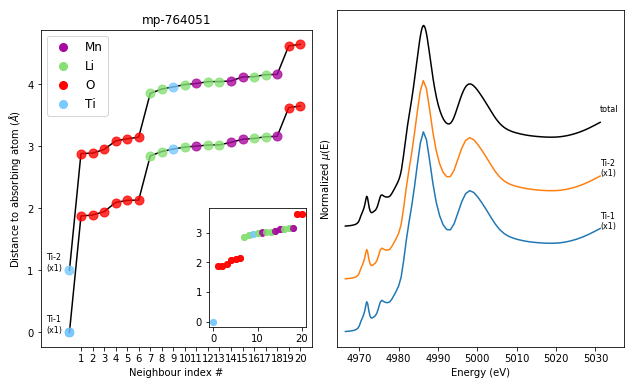

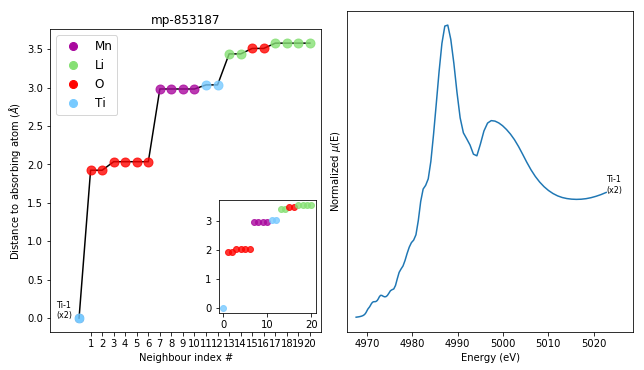

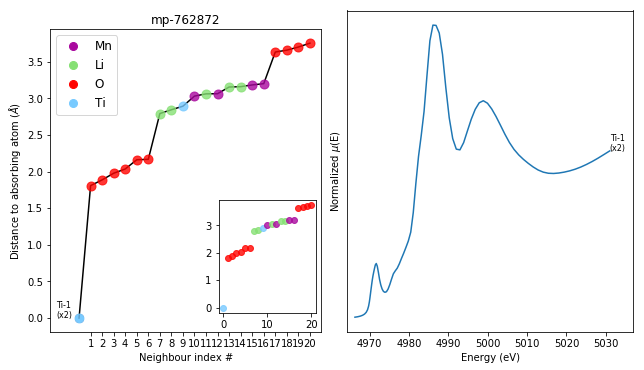

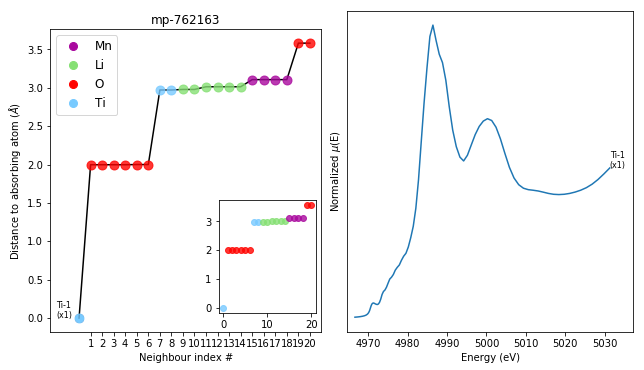

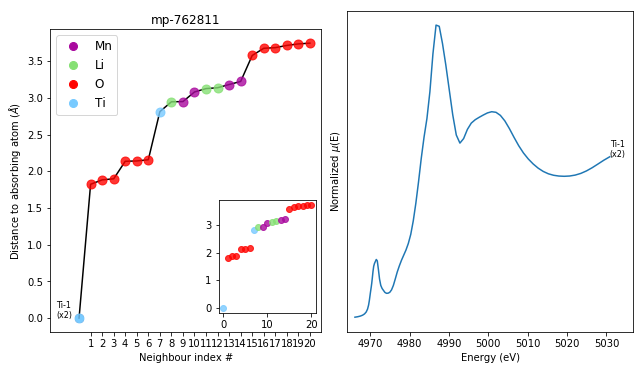

In [9]:
''' Let's plot first 5 structures from 'Li-Mn-Ti-O' search. '''

mpid_list = search_MP(mpr,search_pattern='Li-Mn-Ti-O',nmax=20)
for s in mpid_list[0:5]:
    get_XANES(mpr,mpid=s,absorbing_atom='Ti')

XANES is not available. Try "run_feff=True"


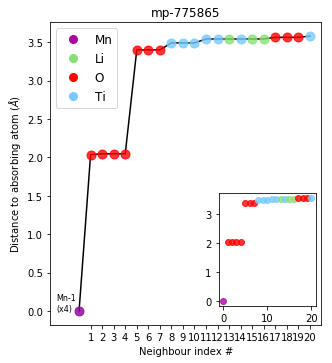

In [10]:
''' If you don't see XANES in the figure, this means that XANES is 
not available in MP or in local database. If you add run_feff=True key,
code will try to run FEFF calculation. But you need to provide licensed 
FEFF executables and modify feff_cmd.sh in lib directory. '''

get_XANES(mpr,mpid='mp-775865',absorbing_atom='Mn',export_figure=True)
# get_XANES(mpr,mpid='mp-775865',absorbing_atom='Mn',export_figure=True,run_feff=True)

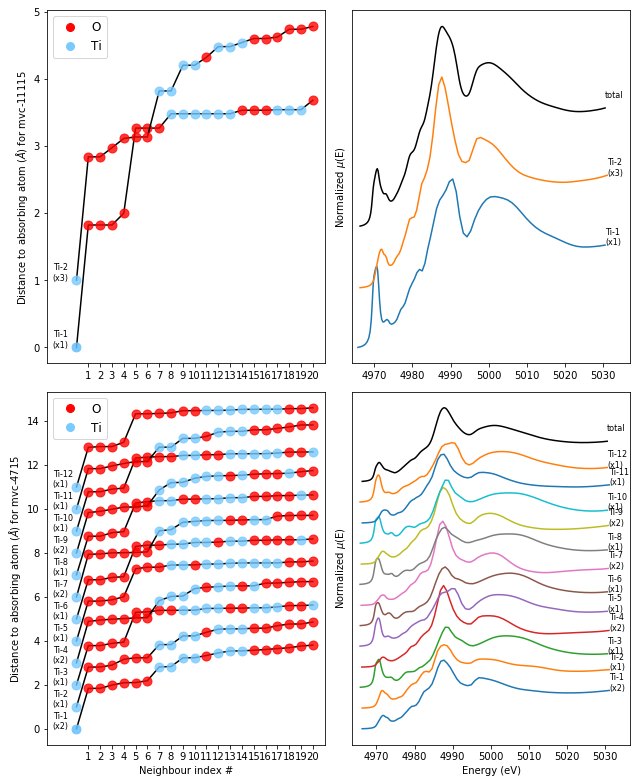

In [11]:
''' If you want to compare two structures in the same plot, you can
use compare_two function. mpid1 and mpid2 are ids of two structures.'''

compare_two(mpid1='mvc-11115',mpid2='mvc-4715',absorbing_atom='Ti')

In [12]:
''' Suppose you have an experimental unknown spectrum and you want to 
compare it with a spectrum in the database. For this task, you can use
compare_my_unknown function as below. First you should place your unknown
spectrum into "unknowns" folder as two-column plain text and give it a
filename like: unknown.txt. You should also provide mpid of reference '''

compare_my_unknown(fname='unknown.txt',mpid='mvc-11115',absorbing_atom='Ti')

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='x-shift in eV:', layout=Layout(border='1px dashed red', height='30px', width='600px'), max=6.0, min=-6.0, readout_format='.1f', step=0.05), FloatSlider(value=0.0, continuous_update=False, description='y-shift in eV:', layout=Layout(border='1px dashed red', height='30px', width='600px'), max=2.0, min=-2.0, readout_format='.1f', step=0.05), Output()), _dom_classes=('widget-interact',))

In [13]:
compare_my_unknown(fname='exp_CuS.txt',mpid='mp-504',absorbing_atom='Cu')

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='x-shift in eV:', layout=Layout(border='1px dashed red', height='30px', width='600px'), max=6.0, min=-6.0, readout_format='.1f', step=0.05), FloatSlider(value=0.0, continuous_update=False, description='y-shift in eV:', layout=Layout(border='1px dashed red', height='30px', width='600px'), max=2.0, min=-2.0, readout_format='.1f', step=0.05), Output()), _dom_classes=('widget-interact',))

In [14]:
compare_my_unknown(fname='exp_Cu2S.txt',mpid='mp-618991',absorbing_atom='Cu',xsrange=[0,10])

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='x-shift in eV:', layout=Layout(border='1px dashed red', height='30px', width='600px'), max=10.0, readout_format='.1f', step=0.05), FloatSlider(value=0.0, continuous_update=False, description='y-shift in eV:', layout=Layout(border='1px dashed red', height='30px', width='600px'), max=2.0, min=-2.0, readout_format='.1f', step=0.05), Output()), _dom_classes=('widget-interact',))